# **SUPPORT VECTOR MACHINES:**

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. In this section, we will develop the intuition behind support vector machines and their use in classification problems.

we saw an example of Naive Bayes classifier where we learned a simple model describing the distribution of each underlying class, and used these generative models to probabilistically determine labels for new points.
That was an example of *generative classification*; here we will consider instead *discriminative classification*: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.





# **WHAT SVM'S DO?**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


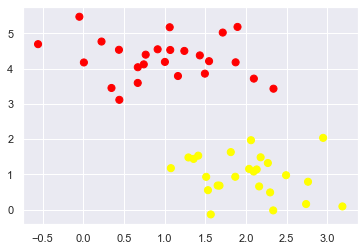

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

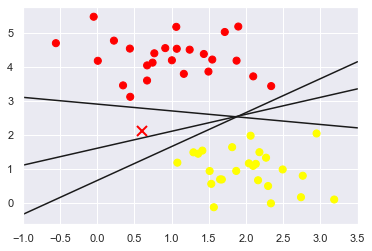

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:



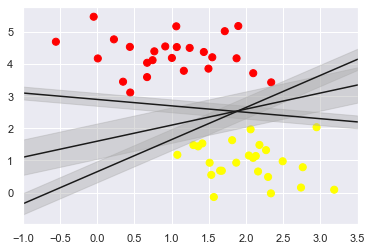

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

In [ ]:
# SVM se manh o cac dataframe ve so, 
# dataframe co nhieu categorical variable -> SVM co the se yeu (0,1) -> Female Male

**In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.**

# **Mushroom data**

In [5]:
import pandas as pd
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Awesome, no missing data!!

In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Quick data processing :

The data is in categorical text form, let us use the Label encoder to convert them from a categorical to numerical form.

**Encode target labels with value between 0 and n_classes-1.**


In [9]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
le = LabelEncoder()
for col in data_encoded.columns:
    data_encoded[col] = le.fit_transform(data_encoded[col]) 

In [10]:
data_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
data_encoded.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# **DATA FOR TRAIN/TEST**

<AxesSubplot:>

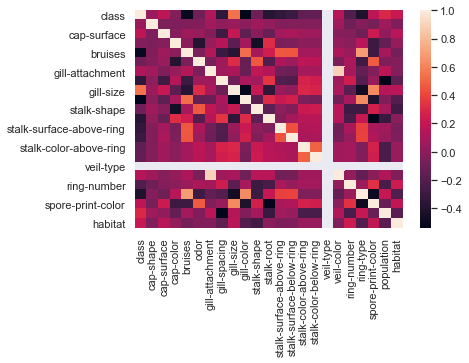

In [12]:
import seaborn as sns
#A correlation between variables
sns.heatmap(data_encoded.corr())
# chi ra moi quan he tuyen tinh giua cac variable

# **A MACHINE LEARNING PIPELINE**

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
X=data_encoded.iloc[:,1:]
y=data_encoded.iloc[:,0]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [20]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [21]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [32]:
model_svm=SVC(kernel = 'linear') # linear, sigmoid, 
model_svm.fit(X_train,y_train)
# SVM yeu cau phai setup kernel

SVC(kernel='linear')

In [33]:
SVM_acc_train=accuracy_score(model_svm.predict(X_train),y_train)
SVM_acc_train

0.9660569820612029

In [26]:
y_pred = model_svm.predict(X_test)

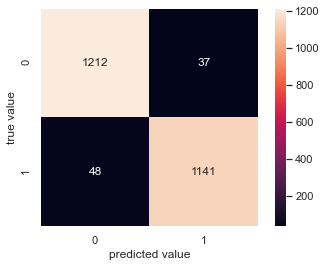

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(y_test,y_pred)
sns.heatmap(C,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1249
           1       0.97      0.96      0.96      1189

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_svm, X, y, cv=5) # tach ra 5 tap train test va tinh accuracy

array([0.78584615, 0.98523077, 0.88      , 0.99815385, 0.70935961])

## Feature Engineering
- label encoding (convert Female, Male) -> (0,1)
- linear regression -> dua tren pvalue loai ra cac bien khong co quan he tuyen tinh
- xu ly na value
- scaller (softmax regression) -> dua cac bien co gia tri so khac nhau ve cung 1 khoang so (1-100) -> (0-1)
- importance feature -> tinh độ quan trọng của các predictive variable đối với target variable

## Case study 

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier # Import RandomForest + Gradient
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [39]:
weather = pd.read_csv('weatherAUS.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [40]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [41]:
weather.dropna(inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [42]:
weather['weekday'] = pd.to_datetime(weather['Date']).dt.dayofweek
days = {0:'Mon', 1:'Tue', 2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
weather['weekday'] = weather['weekday'].apply(lambda x: days[x])

In [43]:
weather['weekday'].unique()

array(['Thu', 'Fri', 'Sun', 'Mon', 'Tue', 'Wed', 'Sat'], dtype=object)

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
weather['Location_le'] = le.fit_transform(weather['Location'])
weather['WindGustDir_le'] = le.fit_transform(weather['WindGustDir'])
weather['WindDir9am_le'] = le.fit_transform(weather['WindDir9am'])
weather['WindDir3pm_le'] = le.fit_transform(weather['WindDir3pm'])
weather['RainToday_le'] = le.fit_transform(weather['RainToday'])
weather['RainTomorrow_le'] = le.fit_transform(weather['RainTomorrow'])
weather['weekday_le'] = le.fit_transform(weather['weekday'])

In [45]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RainTomorrow,weekday,Location_le,WindGustDir_le,WindDir9am_le,WindDir3pm_le,RainToday_le,RainTomorrow_le,weekday_le
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,No,No,Thu,4,11,1,12,0,0,4
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,No,No,Fri,4,8,10,10,0,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,No,No,Sun,4,5,5,6,0,0,3
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,No,No,Mon,4,14,14,15,0,0,1
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,No,No,Tue,4,14,7,14,0,0,5


In [69]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'weekday', 'Location_le',
       'WindGustDir_le', 'WindDir9am_le', 'WindDir3pm_le', 'RainToday_le',
       'RainTomorrow_le', 'weekday_le'],
      dtype='object')

In [46]:
feature_cols = ['Location_le', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir_le', 'WindGustSpeed', 'WindDir9am_le', 'WindDir3pm_le',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm','weekday_le'] # bo sung truong weekday
X = weather[feature_cols]
y = weather ['RainTomorrow_le']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [66]:
# Create Decision Tree classifer object
clf = RandomForestClassifier() #clf: classifier

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
import numpy as np
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis =0)
indices = np.argsort(importances)[::1]

print("Feature ranking:")
for f in range (X_train.shape[1]):
    print("%d. feature %s (%f)" % (f+1, X.columns[indices[f]],importances[indices[f]]))

Feature ranking:
1. feature weekday_le (0.019736)
2. feature WindGustDir_le (0.024704)
3. feature WindDir3pm_le (0.025411)
4. feature WindDir9am_le (0.026174)
5. feature Location_le (0.027914)
6. feature WindSpeed9am (0.028838)
7. feature WindSpeed3pm (0.029743)
8. feature Cloud9am (0.031951)
9. feature Evaporation (0.034967)
10. feature MaxTemp (0.038381)
11. feature Temp9am (0.038382)
12. feature Temp3pm (0.039944)
13. feature MinTemp (0.040287)
14. feature Humidity9am (0.049812)
15. feature Cloud3pm (0.053968)
16. feature WindGustSpeed (0.054745)
17. feature Pressure9am (0.057309)
18. feature Rainfall (0.058246)
19. feature Pressure3pm (0.064340)
20. feature Sunshine (0.111190)
21. feature Humidity3pm (0.143956)


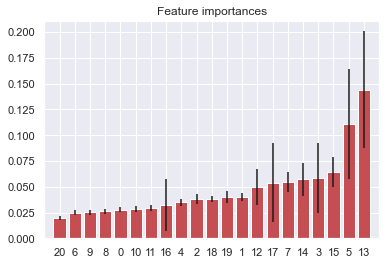

In [68]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [70]:
feature_cols = ['Humidity3pm','Sunshine']
X = weather[feature_cols]
y = weather ['RainTomorrow_le']

DecisionTreeClassifier() 3.015132427215576
RandomForestClassifier() 167.09614539146423
GradientBoostingClassifier() 123.87671756744385


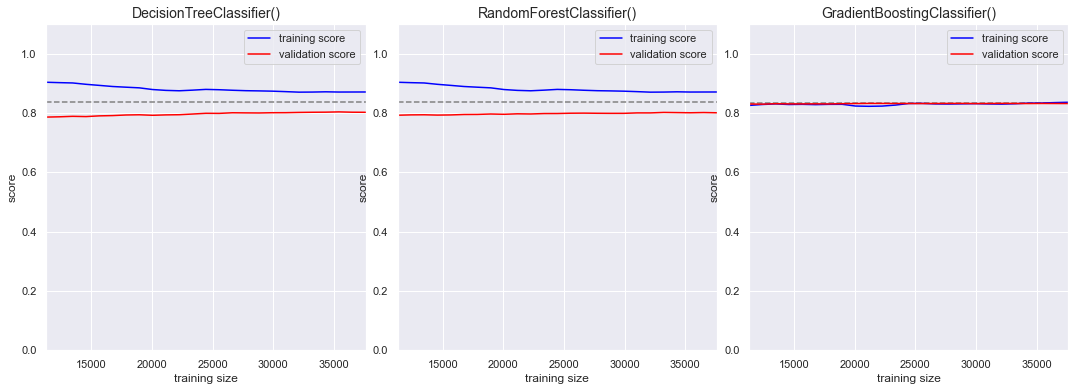

In [71]:
from sklearn.model_selection import learning_curve
import time
fig, ax = plt.subplots(1, 3, figsize=(16, 6)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
models = [DecisionTreeClassifier(), RandomForestClassifier(),
          GradientBoostingClassifier()]
for i, model in enumerate(models):
    start = time.time()
    N, train_lc, val_lc = learning_curve(model,
                                     X, y, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 25)) #cv=3: cat dataset 3 lan, moi lan train va test tren nhung data point khac nhau
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1.1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('{}'.format(model), size=14)
    ax[i].legend(loc='best')
    end = time.time()
    print(model,f"{end - start}")

In [ ]:
# tai sao thoi gian chay Gradient lai nho hon RF trong truong hop nay
# RF no se tach lam 10 sample tren 56000 dong, va train mo hinh va dua ra du bao
#Gradient se di train toan data -> loc ra cac gia tri error va train tiep
# -> bo di 19 bien giup cho Gradient chay nhanh hon

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB  #bayesian classifiers
from sklearn.svm import SVC

GaussianNB() 0.9900722503662109
MultinomialNB() 1.1520087718963623
SVC(kernel='linear') 8860.26810503006


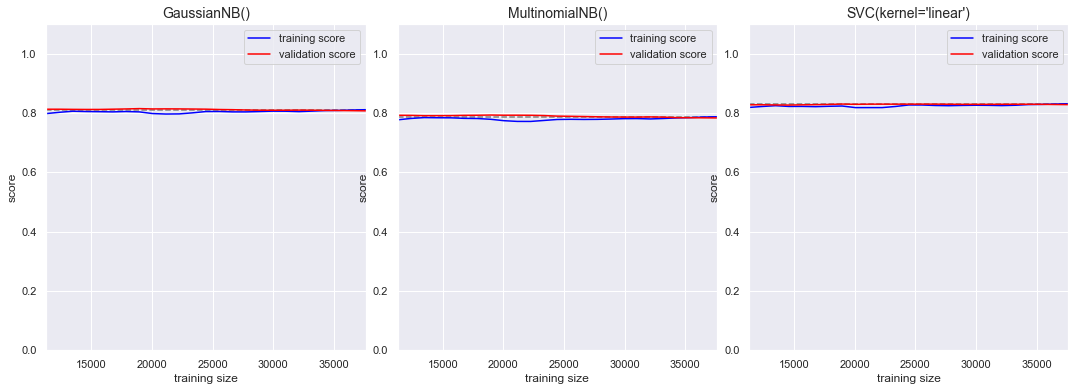

In [73]:
from sklearn.model_selection import learning_curve
import time
fig, ax = plt.subplots(1, 3, figsize=(16, 6)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
models = [GaussianNB(), MultinomialNB(),SVC(kernel = 'linear')]
for i, model in enumerate(models):
    start = time.time()
    N, train_lc, val_lc = learning_curve(model,
                                     X, y, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 25)) #cv=3: cat dataset 3 lan, moi lan train va test tren nhung data point khac nhau
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1.1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('{}'.format(model), size=14)
    ax[i].legend(loc='best')
    end = time.time()
    print(model,f"{end - start}")

In [1]:
print(8860/60)

147.66666666666666


In [ ]:
# SVM se cham vi so luong dong len den 56k. 